the following code is basically the same as tutorial and it works for the 2-classification problem.

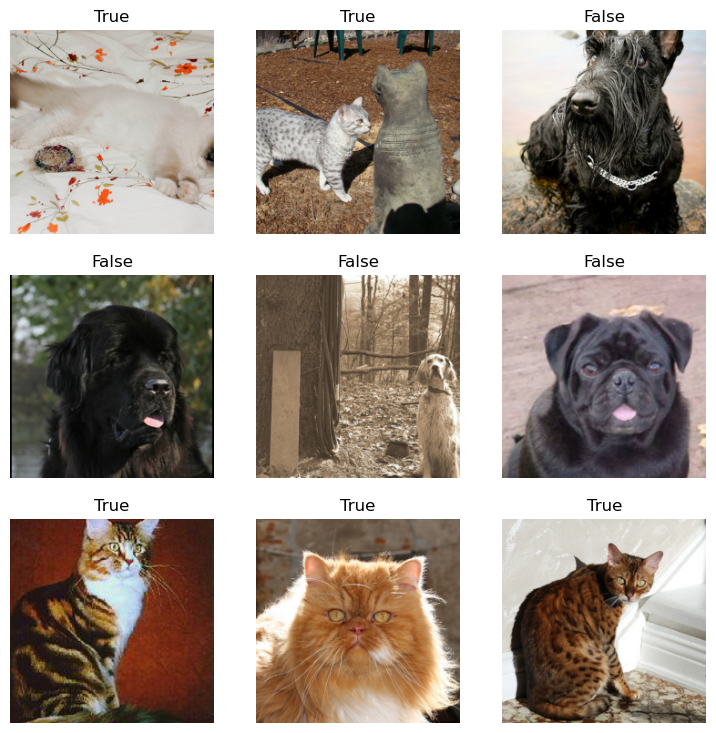

In [11]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)
files = get_image_files(path/"images")

def label_func(f): 
    # 将f转换为Path对象，然后访问其name属性
    return Path(f).name[0].isupper()  # 猫是大写，狗是小写

dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

dls.show_batch()


In [12]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [13]:
# import torch.nn as nn

# num_ftrs = learn.model[-1][-1].in_features  # 取最后一层的输入维度
# learn.model[-1][-1] = nn.Linear(num_ftrs, 2)  # 替换为二分类输出
learn.opt_func = Adam


In [14]:
#learn.lr_find()


In [15]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.168390,0.012131,0.995940,12:32


epoch,train_loss,valid_loss,accuracy,time
0,0.054778,0.013991,0.995264,18:29


In [16]:
learn.validate()


(#2) [0.013991083949804306,0.9952638745307922]

In [17]:
path.ls()

(#3) [Path('C:/Users/Parsifal/.fastai/data/oxford-iiit-pet/annotations'),Path('C:/Users/Parsifal/.fastai/data/oxford-iiit-pet/images'),Path('C:/Users/Parsifal/.fastai/data/oxford-iiit-pet/models')]

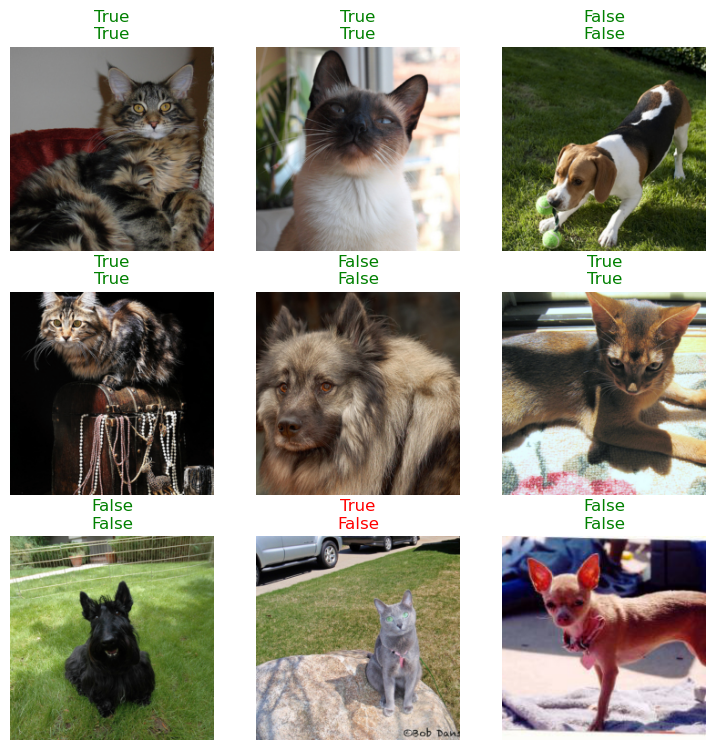

In [18]:
learn.show_results()